In [1]:
import pandas as pd

In [2]:
%%time
Dim_Funds = pd.read_csv('../../dimensions/data_dump/20210301/csv/PaperFunds.csv')
Dim_Funds

CPU times: user 18.3 s, sys: 2.96 s, total: 21.3 s
Wall time: 21.4 s


,id,grant_id,grid_id
0,pub.1084770278,grant.6156394,grid.54432.34
1,pub.1104233902,grant.2591738,grid.280664.e
2,pub.1017353741,grant.2998543,grid.457785.c
3,pub.1017353741,grant.3079228,grid.457785.c
4,pub.1027038639,grant.2671081,grid.429651.d
...,...,...,...
29206011,pub.1086125904,NaN,grid.453006.4
29206012,pub.1086125904,NaN,grid.183804.6
29206013,pub.1131595517,NaN,grid.417730.6
29206014,pub.1131595517,NaN,grid.421816.8


In [3]:
NIH_List = [
'grid.453072.7', 'grid.410422.1', 'grid.453876.b', 'grid.454854.c', 'grid.453035.4',
'grid.48336.3a', 'grid.429651.d', 'grid.280655.c', 'grid.280030.9', 'grid.279885.9', 
'grid.280128.1', 'grid.420085.b', 'grid.419681.3', 'grid.420086.8', 'grid.280347.a', 
'grid.420089.7', 'grid.419633.a', 'grid.419635.c', 'grid.280664.e', 'grid.280785.0', 
'grid.416868.5', 'grid.416870.c', 'grid.280738.6', 'grid.419475.a', 'grid.214431.1', 
'grid.420090.f', 'grid.281076.a', 'grid.410305.3', 'grid.477601.3', 'grid.453518.e', 
'grid.453893.0', 'grid.436341.7', 'grid.484471.a', 'grid.472713.4', 'grid.453125.4', 
'grid.280285.5', 'grid.453840.e', 'grid.94365.3d'
]
NIH_set = set(NIH_List)
print(len(NIH_List), len(NIH_set))
'grid.416868.5' in NIH_set

38 38


True

In [4]:
NSF_List = [
    'grid.248698.9', 'grid.469777.c', 'grid.457768.f', 'grid.457785.c', 'grid.457799.1', 
    'grid.457810.f', 'grid.457836.b', 'grid.457875.c', 'grid.457916.8', 'grid.468022.a', 
    'grid.457966.f', 'grid.457948.3', 'grid.457946.d', 'grid.457896.1', 'grid.503039.c', 
    'grid.422442.6', 'grid.457758.c', 'grid.457907.8', 'grid.473792.c', 'grid.467629.8', 
    'grid.457898.f', 'grid.457972.a', 'grid.438085.2', 'grid.431093.c']
NSF_set = set(NSF_List)
print(len(NSF_List),len(NSF_set))
'grid.416868.5' in NSF_set, 'grid.457810.f' in NSF_set

24 24


(False, True)

In [5]:
%%time
Dim_Funds_NIH = Dim_Funds.loc[Dim_Funds['grid_id'].isin(NIH_set), :]
len(Dim_Funds_NIH)

CPU times: user 1.77 s, sys: 86.9 ms, total: 1.86 s
Wall time: 1.85 s


6947549

In [6]:
%%time
Dim_Funds_NSF = Dim_Funds.loc[Dim_Funds['grid_id'].isin(NSF_set), :]
len(Dim_Funds_NSF)

CPU times: user 2.8 s, sys: 59.9 ms, total: 2.86 s
Wall time: 2.83 s


1117844

In [7]:
%%time
SciNet_Link_Paper_NIH = pd.read_csv('../Final-SciNet-Tables/SciNet_Link_NIH.tsv', sep='\t')
SciNet_Link_Paper_NIH

CPU times: user 1.92 s, sys: 189 ms, total: 2.11 s
Wall time: 2.16 s


,PaperID,NIH_Project_Number
0,3066,R29HL057675
1,3066,R01HL057675
2,3066,R01HL054973
3,15845,P01HD030367
4,15845,M01RR000056
...,...,...
6013182,246319838,R01NS038713
6013183,2082844918,R01MH061138
6013184,2082844918,R01NS038894
6013185,2069345940,P01AR038923


In [8]:
%%time
SciNet_Link_Paper_NSF = pd.read_csv('../Final-SciNet-Tables/SciNet_Link_NSF.tsv', sep='\t')
SciNet_Link_Paper_NSF

CPU times: user 513 ms, sys: 55.8 ms, total: 568 ms
Wall time: 604 ms


,NSF_Award_Number,PaperID,Type,Diff_ZScore
0,NSF-1907207,3101155693,First,NaN
1,NSF-1900929,2966372995,First,NaN
2,NSF-1900929,2973880421,First,NaN
3,NSF-1900929,3042450767,First,NaN
4,NSF-1900929,2987739614,First,NaN
...,...,...,...,...
1309513,NSF-0717364,2898185062,Second,0.0
1309514,NSF-1536171,2989602227,Second,0.0
1309515,NSF-0955773,1963680108,Second,0.0
1309516,NSF-1433817,2079788057,Second,0.0


In [9]:
Dim_Funds_NIH_Ori = Dim_Funds_NIH.copy()
Dim_Funds_NSF_Ori = Dim_Funds_NSF.copy()

In [10]:
Dim_Funds_NIH = Dim_Funds_NIH_Ori.loc[pd.notnull(Dim_Funds_NIH_Ori['grant_id']), :]
len(Dim_Funds_NIH)

6459997

In [11]:
Dim_Funds_NSF = Dim_Funds_NSF_Ori.loc[pd.notnull(Dim_Funds_NSF_Ori['grant_id']), :]
len(Dim_Funds_NSF)

1116104

In [12]:
%%time
len(Dim_Funds_NIH.drop_duplicates(subset=['id','grant_id'])), len(Dim_Funds_NSF.drop_duplicates(subset=['id','grant_id']))

CPU times: user 5.17 s, sys: 705 ms, total: 5.87 s
Wall time: 5.89 s


(6459997, 1116104)

# Analyse NIH Total

In [13]:
%%time
Dim_Funds_NIH_cnt = Dim_Funds_NIH.groupby(['grant_id'])['id'].agg(['count']).reset_index()
print(len(Dim_Funds_NIH_cnt))
Dim_Funds_NIH_cnt.head(5)

335028
CPU times: user 2.28 s, sys: 178 ms, total: 2.46 s
Wall time: 2.46 s


,grant_id,count
0,grant.2343412,1
1,grant.2343434,3
2,grant.2343458,2
3,grant.2343466,1
4,grant.2343479,1


In [14]:
Dim_Funds_NIH_cnt.rename(columns={'count':'paper_count'}, inplace=True)

In [15]:
Dim_Funds_NIH_cnt2 = Dim_Funds_NIH_cnt.groupby(['paper_count'])['grant_id'].agg(['count']).reset_index()
Dim_Funds_NIH_cnt2.head(5)

,paper_count,count
0,1,45552
1,2,34432
2,3,27451
3,4,22235
4,5,18363


In [16]:
Dim_Funds_NIH_cnt2_Sel = Dim_Funds_NIH_cnt2.head(20)

In [17]:
%%time
Dim_Funds_NIH_cnt2_Sel = Dim_Funds_NIH_cnt2_Sel.copy()
Dim_Funds_NIH_cnt2_Sel['pct'] = Dim_Funds_NIH_cnt2_Sel['count'] / Dim_Funds_NIH_cnt2_Sel['count'].sum()

CPU times: user 2.01 ms, sys: 1e+03 µs, total: 3.01 ms
Wall time: 2.88 ms


In [18]:
%%time
SciNet_Link_Paper_NIH_cnt = SciNet_Link_Paper_NIH.groupby(
    ['NIH_Project_Number'])['PaperID'].agg(['count']).reset_index()
SciNet_Link_Paper_NIH_cnt.head(5)

CPU times: user 1.67 s, sys: 140 ms, total: 1.81 s
Wall time: 1.8 s


,NIH_Project_Number,count
0,A02AH000423,1
1,A03AH000601,2
2,A03AH000978,1
3,A03AH001082,2
4,A03AH001165,2


In [19]:
SciNet_Link_Paper_NIH_cnt.rename(columns={'count':'paper_count'}, inplace=True)

In [20]:
%%time
SciNet_Link_Paper_NIH_cnt2 = SciNet_Link_Paper_NIH_cnt.groupby(
    ['paper_count'])['NIH_Project_Number'].agg(['count']).reset_index()
SciNet_Link_Paper_NIH_cnt2.head(5)

CPU times: user 66.4 ms, sys: 929 µs, total: 67.3 ms
Wall time: 66 ms


,paper_count,count
0,1,70353
1,2,44107
2,3,33223
3,4,25993
4,5,20905


In [21]:
SciNet_Link_Paper_NIH_cnt2_Sel = SciNet_Link_Paper_NIH_cnt2.head(20)

In [22]:
SciNet_Link_Paper_NIH_cnt2_Sel = SciNet_Link_Paper_NIH_cnt2_Sel.copy()
SciNet_Link_Paper_NIH_cnt2_Sel['pct'] = SciNet_Link_Paper_NIH_cnt2_Sel['count'] \
/ SciNet_Link_Paper_NIH_cnt2_Sel['count'].sum()

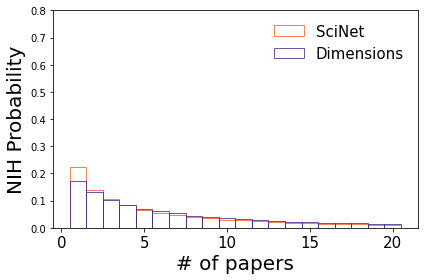

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.bar(SciNet_Link_Paper_NIH_cnt2_Sel.paper_count,
        SciNet_Link_Paper_NIH_cnt2_Sel.pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciNet',alpha=0.8, 
         fill= False
        )
plt.bar(Dim_Funds_NIH_cnt2_Sel.paper_count,
        Dim_Funds_NIH_cnt2_Sel.pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=20)
plt.ylabel('NIH Probability',size=20)
plt.xticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
# plt.yticks(,fontsize=15)
plt.ylim(0,0.8)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=15,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()

# Analyse NSF Total

In [24]:
%%time
Dim_Funds_NSF_cnt = Dim_Funds_NSF.groupby(['grant_id'])['id'].agg(['count']).reset_index()
print(len(Dim_Funds_NSF_cnt))
Dim_Funds_NSF_cnt.head(5)

168713
CPU times: user 721 ms, sys: 65.7 ms, total: 786 ms
Wall time: 785 ms


,grant_id,count
0,grant.2990010,3
1,grant.2990011,1
2,grant.2990012,3
3,grant.2990016,4
4,grant.2990024,15


In [25]:
Dim_Funds_NSF_cnt.rename(columns={'count':'paper_count'}, inplace=True)

In [26]:
%%time
Dim_Funds_NSF_cnt2 = Dim_Funds_NSF_cnt.groupby(['paper_count'])['grant_id'].agg(['count']).reset_index()
Dim_Funds_NSF_cnt2.head(5)

CPU times: user 39.3 ms, sys: 954 µs, total: 40.3 ms
Wall time: 39.4 ms


,paper_count,count
0,1,44306
1,2,26690
2,3,18622
3,4,13928
4,5,10712


In [27]:
Dim_Funds_NSF_cnt2_Sel = Dim_Funds_NSF_cnt2.head(20)

In [28]:
Dim_Funds_NSF_cnt2.head(20)['count'].sum() / Dim_Funds_NSF_cnt2['count'].sum()

0.9504483946109665

In [29]:
%%time
Dim_Funds_NSF_cnt2_Sel = Dim_Funds_NSF_cnt2_Sel.copy()
Dim_Funds_NSF_cnt2_Sel['pct'] = Dim_Funds_NSF_cnt2_Sel['count'] / Dim_Funds_NSF_cnt2_Sel['count'].sum()

CPU times: user 2.66 ms, sys: 0 ns, total: 2.66 ms
Wall time: 2.54 ms


In [30]:
SciNet_Link_Paper_NSF_Ori = SciNet_Link_Paper_NSF.copy()
len(SciNet_Link_Paper_NSF_Ori)

1309518

In [31]:
%%time
SciNet_Link_Paper_NSF_Ori_cnt= SciNet_Link_Paper_NSF_Ori.groupby(
    ['NSF_Award_Number'])['PaperID'].agg(['count']).reset_index()
SciNet_Link_Paper_NSF_Ori_cnt.rename(columns={'count':'SciNet_paper_count'},inplace=True)

CPU times: user 324 ms, sys: 32.2 ms, total: 356 ms
Wall time: 352 ms


In [32]:
SciNet_Link_Paper_NSF = SciNet_Link_Paper_NSF_Ori.loc[SciNet_Link_Paper_NSF_Ori['Type'].isin(['First','Crossref']),:]
len(SciNet_Link_Paper_NSF)

1130641

In [33]:
%%time
SciNet_Link_Paper_NSF_cnt= SciNet_Link_Paper_NSF.groupby(
    ['NSF_Award_Number'])['PaperID'].agg(['count']).reset_index()
SciNet_Link_Paper_NSF_cnt.head(5)

CPU times: user 283 ms, sys: 34 ms, total: 317 ms
Wall time: 314 ms


,NSF_Award_Number,count
0,NSF-0000000,2
1,NSF-0000031,1
2,NSF-0000050,3
3,NSF-0000096,1
4,NSF-0000135,1


In [34]:
len(SciNet_Link_Paper_NSF_cnt[SciNet_Link_Paper_NSF_cnt['count'] == 1])

28924

In [35]:
SciNet_Link_Paper_NSF_cnt.rename(columns={'count':'paper_count'}, inplace=True)

In [36]:
%%time
SciNet_Link_Paper_NSF_cnt2 = SciNet_Link_Paper_NSF_cnt.groupby(
    ['paper_count'])['NSF_Award_Number'].agg(['count']).reset_index()
SciNet_Link_Paper_NSF_cnt2.head(5)

CPU times: user 22.1 ms, sys: 3.64 ms, total: 25.7 ms
Wall time: 25 ms


,paper_count,count
0,1,28924
1,2,18652
2,3,14446
3,4,11881
4,5,9860


In [37]:
SciNet_Link_Paper_NSF_cnt2_Sel = SciNet_Link_Paper_NSF_cnt2.head(20)

In [38]:
SciNet_Link_Paper_NSF_cnt2_Sel['count'].sum() / SciNet_Link_Paper_NSF_cnt2['count'].sum()

0.9339744839689128

In [39]:
SciNet_Link_Paper_NSF_cnt2_Sel = SciNet_Link_Paper_NSF_cnt2_Sel.copy()
SciNet_Link_Paper_NSF_cnt2_Sel['pct'] = SciNet_Link_Paper_NSF_cnt2_Sel['count'] \
/ SciNet_Link_Paper_NSF_cnt2_Sel['count'].sum()

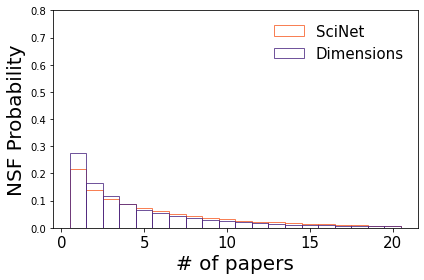

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.bar(SciNet_Link_Paper_NSF_cnt2_Sel.paper_count,
        SciNet_Link_Paper_NSF_cnt2_Sel.pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciNet',alpha=0.8, 
         fill= False
        )
plt.bar(Dim_Funds_NSF_cnt2_Sel.paper_count,
        Dim_Funds_NSF_cnt2_Sel.pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=20)
plt.ylabel('NSF Probability',size=20)
plt.xticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
# plt.yticks(,fontsize=15)
plt.ylim(0,0.8)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=15,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()

# Read real Grants

In [41]:
%%time
import gzip
import json
with gzip.open('../../dimensions/data_dump/20210301/csv/grants.json.gz', 'r') as f:
    data_grant_raw = f.read()
    data_grant_total = json.loads(data_grant_raw.decode('utf-8'))
len(data_grant_total)

CPU times: user 40.5 s, sys: 7.13 s, total: 47.7 s
Wall time: 47.6 s


5748802

In [42]:
%%time
df_grant_total = pd.DataFrame(data_grant_total)
df_grant_total.tail(5)

CPU times: user 7.38 s, sys: 2.25 s, total: 9.63 s
Wall time: 9.64 s


,id,title,funding_usd,start_date,end_date,researcher_ids,funder_org,grant_number
5748797,grant.7291896,Catechesis as a means of health and holiness i...,NaN,2004-01-01,None,[ur.016543474701.03],grid.425534.1,20.500.11892/18142
5748798,grant.7215880,The popularisation of old testament studies : ...,NaN,1998-01-01,None,[ur.014615630134.14],grid.425534.1,20.500.11892/37091
5748799,grant.7388001,The Holy Spirit in the Qur'an an assessment fr...,NaN,2006-01-01,None,[ur.016705020400.47],grid.425534.1,20.500.11892/32023
5748800,grant.7231945,A comparative psychological study of religious...,NaN,1971-01-01,None,[ur.015571321160.44],grid.425534.1,20.500.11892/139257
5748801,grant.7302156,The origins and development of the Zionist mov...,NaN,1987-01-01,None,[ur.015510335030.28],grid.425534.1,20.500.11892/79554


## NIH

In [43]:
%%time
df_grant_total_NIH = df_grant_total.loc[df_grant_total['funder_org'].isin(NIH_List),:]
len(df_grant_total_NIH)

CPU times: user 923 ms, sys: 44.6 ms, total: 967 ms
Wall time: 955 ms


461616

In [44]:
%%time
df_grant_total_NIH_Sel = df_grant_total_NIH.loc[:,['id','grant_number']].copy()

CPU times: user 62.4 ms, sys: 7.9 ms, total: 70.3 ms
Wall time: 67.9 ms


In [45]:
%%time
df_G_total_NIH_Sel = df_grant_total_NIH_Sel.merge(Dim_Funds_NIH_cnt,left_on='id',right_on='grant_id',how='left')
df_G_total_NIH_Sel[['paper_count']] = df_G_total_NIH_Sel[['paper_count']].fillna(value=0)

CPU times: user 702 ms, sys: 98.9 ms, total: 801 ms
Wall time: 795 ms


In [46]:
SciNet_Link_Paper_NIH_cnt.rename(columns={'paper_count':'SciNet_paper_count'}, inplace=True)

In [47]:
df_G_total_NIH = df_G_total_NIH_Sel.merge(SciNet_Link_Paper_NIH_cnt,
                                          how='left',left_on='grant_number',right_on='NIH_Project_Number')

In [48]:
%%time
df_G_total_NIH[['SciNet_paper_count']] = df_G_total_NIH[['SciNet_paper_count']].fillna(value=0)

CPU times: user 151 ms, sys: 15.1 ms, total: 166 ms
Wall time: 163 ms


In [49]:
%%time
import scipy.stats
test_NIH = scipy.stats.pearsonr(df_G_total_NIH['paper_count'].values, df_G_total_NIH['SciNet_paper_count'].values)
test_NIH

CPU times: user 574 ms, sys: 62.2 ms, total: 636 ms
Wall time: 1.07 s


(0.9834229974280784, 0.0)

In [50]:
%%time
import scipy.stats
test_NIH = scipy.stats.spearmanr(df_G_total_NIH['paper_count'].values, df_G_total_NIH['SciNet_paper_count'].values)
test_NIH

CPU times: user 2.89 s, sys: 138 ms, total: 3.03 s
Wall time: 133 ms


SpearmanrResult(correlation=0.9641656799994021, pvalue=0.0)

In [51]:
%%time
df_G_total_NIH_dim2 = df_G_total_NIH.groupby(['paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NIH_dim2['pct'] = df_G_total_NIH_dim2['count'] / df_G_total_NIH_dim2['count'].sum()

CPU times: user 1.66 s, sys: 70.1 ms, total: 1.73 s
Wall time: 72.2 ms


In [52]:
%%time
df_G_total_NIH_sci2 = df_G_total_NIH.groupby(['SciNet_paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NIH_sci2['pct'] = df_G_total_NIH_sci2['count'] / df_G_total_NIH_sci2['count'].sum()

CPU times: user 1.53 s, sys: 67.7 ms, total: 1.6 s
Wall time: 68.2 ms


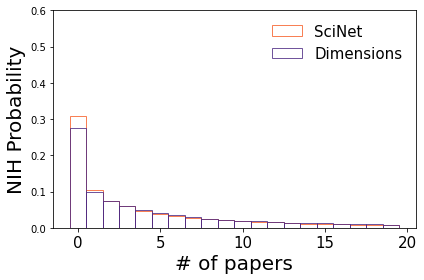

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.bar(df_G_total_NIH_sci2.head(20).SciNet_paper_count,
        df_G_total_NIH_sci2.head(20).pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciNet',alpha=0.8, 
         fill= False
        )
plt.bar(df_G_total_NIH_dim2.head(20).paper_count,
        df_G_total_NIH_dim2.head(20).pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=20)
plt.ylabel('NIH Probability',size=20)
plt.xticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
# plt.yticks(,fontsize=15)
plt.ylim(0,0.6)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=15,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()

In [54]:
df_G_total_NIH_Further = df_G_total_NIH.groupby(['paper_count'])['SciNet_paper_count'].mean().reset_index()

## NSF

In [55]:
%%time
df_grant_total_NSF = df_grant_total.loc[df_grant_total['funder_org'].isin(NSF_List),:]

CPU times: user 923 ms, sys: 115 ms, total: 1.04 s
Wall time: 1.03 s


In [56]:
def add_prefix(text):
    return 'NSF-' + text
add_prefix('0734784')

'NSF-0734784'

In [57]:
len(Dim_Funds_NSF_cnt) / len(df_grant_total_NSF)

0.3174011607671975

In [58]:
%%time
df_grant_total_NSF_Sel = df_grant_total_NSF.loc[:,['id','grant_number']].copy()

CPU times: user 74.6 ms, sys: 3.95 ms, total: 78.6 ms
Wall time: 77.4 ms


In [59]:
%%time
df_grant_total_NSF_Sel['new_grant_number'] = df_grant_total_NSF_Sel['grant_number'].apply(add_prefix)

CPU times: user 172 ms, sys: 23.3 ms, total: 195 ms
Wall time: 193 ms


In [60]:
%%time
df_G_total_NSF_Sel = df_grant_total_NSF_Sel.merge(Dim_Funds_NSF_cnt,left_on='id',right_on='grant_id',how='left')

CPU times: user 510 ms, sys: 69.4 ms, total: 579 ms
Wall time: 573 ms


In [61]:
%%time
df_G_total_NSF_Sel[['paper_count']] = df_G_total_NSF_Sel[['paper_count']].fillna(value=0)

CPU times: user 141 ms, sys: 14.9 ms, total: 156 ms
Wall time: 154 ms


In [62]:
len(df_G_total_NSF_Sel[df_G_total_NSF_Sel['paper_count'] == 0]) / len(df_G_total_NSF_Sel)

0.6825988392328025

In [63]:
SciNet_Link_Paper_NSF_cnt['paper_count'].sum()

1130641

In [64]:
SciNet_Link_Paper_NSF_cnt.rename(columns={'paper_count':'SciNet_paper_count'}, inplace=True)

In [65]:
SciNet_Link_Paper_NSF_cnt['SciNet_paper_count'].sum()

1130641

In [66]:
len(df_G_total_NSF_Sel[df_G_total_NSF_Sel['new_grant_number'].isin(SciNet_Link_Paper_NSF_cnt['NSF_Award_Number'])])

142555

In [67]:
%%time
df_G_total_NSF = df_G_total_NSF_Sel.merge(SciNet_Link_Paper_NSF_cnt,
                                          how='left',left_on='new_grant_number',right_on='NSF_Award_Number')

CPU times: user 378 ms, sys: 28 ms, total: 406 ms
Wall time: 404 ms


In [68]:
%%time
df_G_total_NSF[['SciNet_paper_count']] = df_G_total_NSF[['SciNet_paper_count']].fillna(value=0)

CPU times: user 171 ms, sys: 17 ms, total: 188 ms
Wall time: 186 ms


In [69]:
df_G_total_NSF['SciNet_paper_count'].sum()

1128746.0

In [70]:
%%time
df_G_total_NSF_dim2 = df_G_total_NSF.groupby(['paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NSF_dim2['pct'] = df_G_total_NSF_dim2['count'] / df_G_total_NSF_dim2['count'].sum()
df_G_total_NSF_dim2.head(5)

CPU times: user 69.9 ms, sys: 10.5 ms, total: 80.5 ms
Wall time: 79.2 ms


,paper_count,count,pct
0,0.0,362832,0.682599
1,1.0,44306,0.083353
2,2.0,26690,0.050212
3,3.0,18622,0.035034
4,4.0,13928,0.026203


In [71]:
%%time
df_G_total_NSF_sci2 = df_G_total_NSF.groupby(['SciNet_paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NSF_sci2['pct'] = df_G_total_NSF_sci2['count'] / df_G_total_NSF_sci2['count'].sum()
df_G_total_NSF_sci2.head(5)

CPU times: user 70.9 ms, sys: 1.02 ms, total: 72 ms
Wall time: 69.3 ms


,SciNet_paper_count,count,pct
0,0.0,388990,0.731810
1,1.0,28209,0.053070
2,2.0,18487,0.034780
3,3.0,14381,0.027055
4,4.0,11841,0.022277


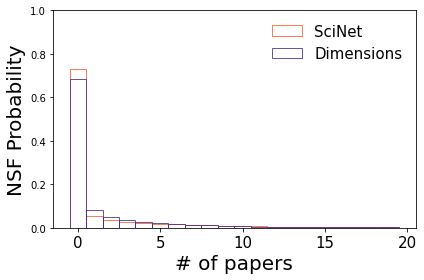

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.bar(df_G_total_NSF_sci2.head(20).SciNet_paper_count,
        df_G_total_NSF_sci2.head(20).pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciNet',alpha=0.8, 
         fill= False
        )
plt.bar(df_G_total_NSF_dim2.head(20).paper_count,
        df_G_total_NSF_dim2.head(20).pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=20)
plt.ylabel('NSF Probability',size=20)
plt.xticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
# plt.yticks(,fontsize=15)
plt.ylim(0,1)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=15,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()

In [73]:
(len(df_G_total_NSF.loc[
    (df_G_total_NSF['paper_count']>=100),
    :]),
len(df_G_total_NSF.loc[
    (df_G_total_NSF['SciNet_paper_count']>=100),
    :]))

(509, 548)

In [74]:
len(df_G_total_NSF.loc[
    (df_G_total_NSF['paper_count']<=70) &
    (df_G_total_NSF['SciNet_paper_count']>=100),
    :])

222

In [75]:
len(df_G_total_NSF.loc[
    (df_G_total_NSF['paper_count']>=100) &
    (df_G_total_NSF['SciNet_paper_count']<=70),
    :])

206

In [76]:
%%time
import scipy.stats
test_NSF = scipy.stats.pearsonr(df_G_total_NSF['paper_count'].values, df_G_total_NSF['SciNet_paper_count'].values)
test_NSF

CPU times: user 295 ms, sys: 9.94 ms, total: 305 ms
Wall time: 19.4 ms


(0.6656583162974505, 0.0)

In [77]:
%%time
import scipy.stats
test_NSF2 = scipy.stats.spearmanr(df_G_total_NSF['paper_count'].values, df_G_total_NSF['SciNet_paper_count'].values)
test_NSF2

CPU times: user 2.03 s, sys: 87.6 ms, total: 2.12 s
Wall time: 85.6 ms


SpearmanrResult(correlation=0.7130332374331259, pvalue=0.0)

In [78]:
df_G_total_NSF_Further = df_G_total_NSF.groupby(['paper_count'])['SciNet_paper_count'].mean().reset_index()

# NSF RePORTER

In [79]:
%%time
import pandas as pd
df_NSF = pd.read_csv("../NSF_RePORTER/FedRePORTER_PUB_C_NSF.csv",dtype=str)

CPU times: user 6.06 s, sys: 344 ms, total: 6.41 s
Wall time: 2.48 s


In [80]:
df_NSF['rep_grant_num'] = df_NSF['COMMON_PROJECT_NUMBER'].apply(add_prefix)

In [81]:
df_NSF_rep_cnt = df_NSF.groupby(['rep_grant_num'])[' TITLE'].agg(['count']).reset_index()

In [82]:
df_NSF_rep_cnt_merge = df_NSF_rep_cnt.merge(
    df_G_total_NSF[['new_grant_number','SciNet_paper_count']], how='left',
    left_on='rep_grant_num', right_on='new_grant_number')

In [83]:
%%time
import scipy.stats
test_NSF = scipy.stats.pearsonr(
    df_NSF_rep_cnt_merge['count'].values, df_NSF_rep_cnt_merge['SciNet_paper_count'].values)
test_NSF

CPU times: user 166 ms, sys: 16.3 ms, total: 182 ms
Wall time: 10.7 ms


(0.8466934500463699, 0.0)

In [84]:
%%time
import scipy.stats
test_NSF = scipy.stats.spearmanr(
    df_NSF_rep_cnt_merge['count'].values, df_NSF_rep_cnt_merge['SciNet_paper_count'].values)
test_NSF

CPU times: user 294 ms, sys: 12.3 ms, total: 306 ms
Wall time: 12.4 ms


SpearmanrResult(correlation=0.760349347199499, pvalue=0.0)

# Final

In [85]:
len(SciNet_Link_Paper_NSF_cnt), len(SciNet_Link_Paper_NSF_Ori_cnt)

(143596, 148148)

In [86]:
SciNet_Link_Paper_NSF_Ori_cnt['SciNet_paper_count'].sum(), SciNet_Link_Paper_NSF_cnt['SciNet_paper_count'].sum()

(1309518, 1130641)

In [87]:
len(Dim_Funds_NSF_cnt)

168713

In [88]:
df_grant_total_NSF_Sel_Fuzzy = df_grant_total_NSF.loc[:,['id','grant_number']].copy()
df_grant_total_NSF_Sel_Fuzzy['new_grant_number'] = df_grant_total_NSF_Sel_Fuzzy['grant_number'].apply(add_prefix)

In [89]:
df_G_total_NSF_Sel_Fuzzy = df_grant_total_NSF_Sel_Fuzzy.merge(
    Dim_Funds_NSF_cnt,left_on='id',right_on='grant_id',how='left')
df_G_total_NSF_Sel_Fuzzy[['paper_count']] = df_G_total_NSF_Sel_Fuzzy[['paper_count']].fillna(value=0)

In [90]:
df_G_total_NSF_Sel_Fuzzy = df_G_total_NSF_Sel_Fuzzy.merge(
    SciNet_Link_Paper_NSF_cnt,left_on='new_grant_number',right_on='NSF_Award_Number',how='left')
df_G_total_NSF_Sel_Fuzzy[['SciNet_paper_count']] = df_G_total_NSF_Sel_Fuzzy[['SciNet_paper_count']].fillna(value=0)

In [91]:
Res_startswith = []
# for i in range(80,100):
#     Res_startswith.append(str(i))
for i in range(10,21):
    Res_startswith.append(str(i))
Res_startswith.extend(['00','01','02','03','04',
                      '05','06','07','08','09'])
Res_startswith_tuple = tuple(Res_startswith)

In [92]:
df_G_total_NSF_Sel_Fuzzy_Comp = df_G_total_NSF_Sel_Fuzzy.loc[
    df_G_total_NSF_Sel_Fuzzy['grant_number'].str.startswith(Res_startswith_tuple)
    ,:
]

In [93]:
df_G_total_NSF_Sel_Fuzzy_Comp['SciNet_paper_count'].sum()

1118170.0

In [94]:
df_G_total_NSF_Sel_Fuzzy_Comp['paper_count'].sum()

1020342.0

In [95]:
%%time
import scipy.stats
test_NSF = scipy.stats.spearmanr(
    df_G_total_NSF_Sel_Fuzzy_Comp['paper_count'].values, df_G_total_NSF_Sel_Fuzzy_Comp['SciNet_paper_count'].values)
test_NSF

CPU times: user 225 ms, sys: 12.6 ms, total: 237 ms
Wall time: 47.2 ms


SpearmanrResult(correlation=0.6990621031673347, pvalue=0.0)

In [96]:
df_G_total_NSF_Sel_Fuzzy_Comp_Further = df_G_total_NSF_Sel_Fuzzy_Comp.groupby(
    ['paper_count'])['SciNet_paper_count'].mean().reset_index()

In [97]:
%%time
df_G_total_NSF_dim3 = df_G_total_NSF_Sel_Fuzzy_Comp.groupby(['paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NSF_dim3['pct'] = df_G_total_NSF_dim3['count'] / df_G_total_NSF_dim3['count'].sum()

CPU times: user 1.03 s, sys: 40.8 ms, total: 1.07 s
Wall time: 43 ms


In [98]:
%%time
df_G_total_NSF_sci3 = df_G_total_NSF_Sel_Fuzzy_Comp.groupby(['SciNet_paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NSF_sci3['pct'] = df_G_total_NSF_sci3['count'] / df_G_total_NSF_sci3['count'].sum()

CPU times: user 952 ms, sys: 32.7 ms, total: 984 ms
Wall time: 39.7 ms


In [99]:
df_G_total_NSF_dim3['count'].sum(), df_G_total_NSF_sci3['count'].sum()

(248841, 248841)

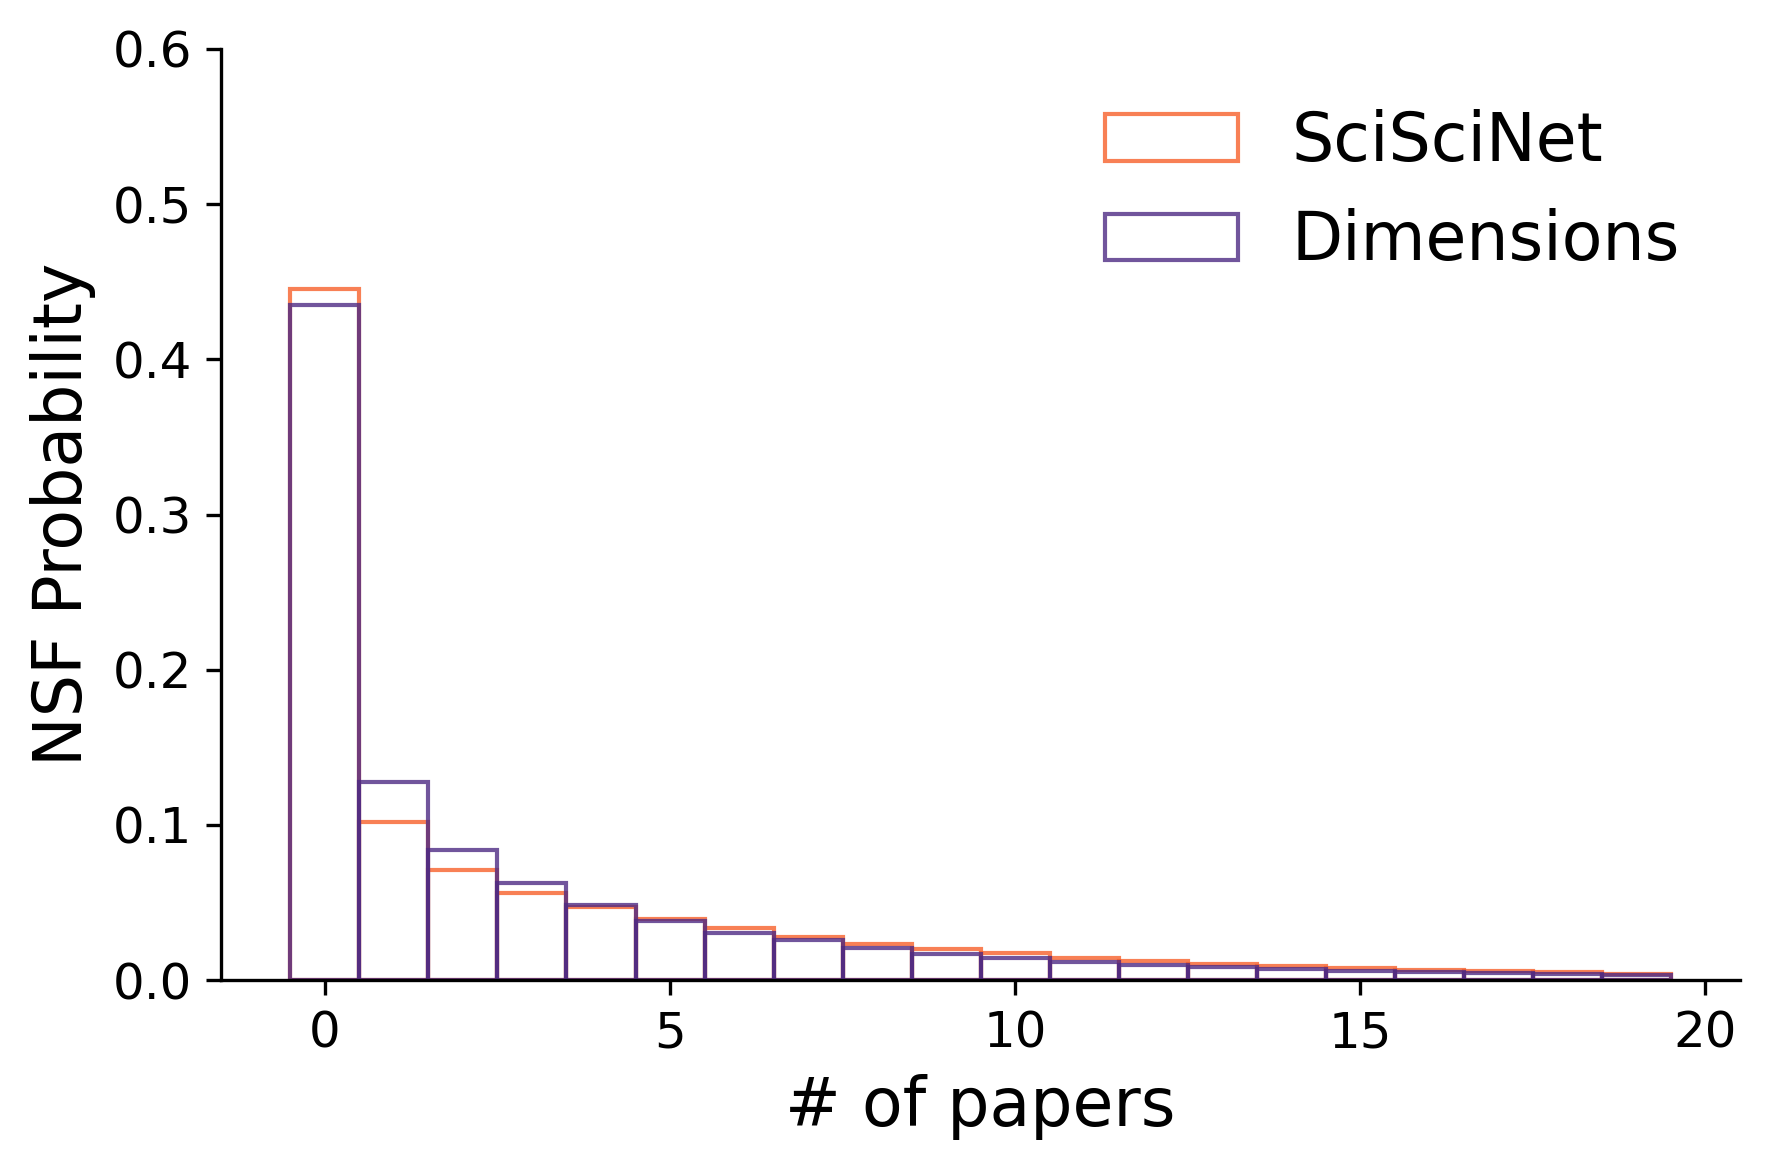

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(dpi=300)

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.bar(df_G_total_NSF_sci3.head(20).SciNet_paper_count,
        df_G_total_NSF_sci3.head(20).pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciSciNet',alpha=0.8, 
         fill= False
        )
plt.bar(df_G_total_NSF_dim3.head(20).paper_count,
        df_G_total_NSF_dim3.head(20).pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=16)
plt.ylabel('NSF Probability',size=16)
# plt.xticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
plt.ylim(0,0.6)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=16,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()

In [101]:
# f.savefig('./Figures/6_SciSciNet_Dim_NSF_ReNew2000-2020_Re.pdf', bbox_inches="tight", format="pdf")

In [102]:
## NIH

In [101]:
def remove_first(text):
    return text[1:]
remove_first('N01AR22261-12-0-1')

'01AR22261-12-0-1'

In [102]:
len(df_grant_total_NIH[pd.isnull(df_grant_total_NIH['start_date'])])

0

In [103]:
from datetime import datetime
date1 = datetime.strptime('01/01/2000', "%m/%d/%Y")

In [104]:
from datetime import datetime
import numpy as np
def change_dt(text):
    if text is np.nan:
        return np.nan
    else:
        return datetime.strptime(text, "%Y-%m-%d")
change_dt('1989-09-29')

datetime.datetime(1989, 9, 29, 0, 0)

In [105]:
%%time
df_grant_total_NIH_Sel = df_grant_total_NIH.copy()
df_grant_total_NIH_Sel['datet'] = df_grant_total_NIH['start_date'].apply(change_dt)

CPU times: user 2.73 s, sys: 131 ms, total: 2.86 s
Wall time: 2.86 s


In [106]:
len(df_grant_total_NIH_Sel[df_grant_total_NIH_Sel['datet'] >= date1])

294593

In [107]:
df_grant_total_NIH_Sel_Fuzzy = df_grant_total_NIH_Sel.loc[df_grant_total_NIH_Sel['datet'] >= date1,
                                                          ['id','grant_number']].copy()
len(df_grant_total_NIH_Sel_Fuzzy)

294593

In [108]:
df_G_total_NIH_Sel_Fuzzy = df_grant_total_NIH_Sel_Fuzzy.merge(
    Dim_Funds_NIH_cnt,left_on='id',right_on='grant_id',how='left')
df_G_total_NIH_Sel_Fuzzy[['paper_count']] = df_G_total_NIH_Sel_Fuzzy[['paper_count']].fillna(value=0)

In [109]:
df_G_total_NIH_Sel_Fuzzy = df_G_total_NIH_Sel_Fuzzy.merge(
    SciNet_Link_Paper_NIH_cnt,left_on='grant_number',right_on='NIH_Project_Number',how='left')
df_G_total_NIH_Sel_Fuzzy[['SciNet_paper_count']] = df_G_total_NIH_Sel_Fuzzy[['SciNet_paper_count']].fillna(value=0)

In [110]:
Res_startswith = []
# for i in range(80,100):
#     Res_startswith.append(str(i))
for i in range(10,21):
    Res_startswith.append(str(i))
Res_startswith.extend(['00','01','02','03','04',
                      '05','06','07','08','09'])
Res_startswith_tuple = tuple(Res_startswith)

In [111]:
%%time
import scipy.stats
test_NSF = scipy.stats.pearsonr(
    df_G_total_NIH_Sel_Fuzzy['paper_count'].values, df_G_total_NIH_Sel_Fuzzy['SciNet_paper_count'].values)
test_NSF

CPU times: user 264 ms, sys: 18.7 ms, total: 283 ms
Wall time: 16 ms


(0.9583082893726463, 0.0)

In [112]:
%%time
import scipy.stats
test_NSF = scipy.stats.spearmanr(
    df_G_total_NIH_Sel_Fuzzy['paper_count'].values, df_G_total_NIH_Sel_Fuzzy['SciNet_paper_count'].values)
test_NSF

CPU times: user 1.41 s, sys: 54.4 ms, total: 1.47 s
Wall time: 59.3 ms


SpearmanrResult(correlation=0.9727509829005142, pvalue=0.0)

In [113]:
df_G_total_NIH_Sel_Fuzzy_Further = df_G_total_NIH_Sel_Fuzzy.groupby(
    ['paper_count'])['SciNet_paper_count'].mean().reset_index()

In [114]:
%%time
df_G_total_NIH_dim3 = df_G_total_NIH_Sel_Fuzzy.groupby(['paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NIH_dim3['pct'] = df_G_total_NIH_dim3['count'] / df_G_total_NIH_dim3['count'].sum()
df_G_total_NIH_dim3.head(5)

CPU times: user 1.27 s, sys: 48 ms, total: 1.31 s
Wall time: 53 ms


,paper_count,count,pct
0,0.0,77466,0.262959
1,1.0,29958,0.101693
2,2.0,23555,0.079958
3,3.0,18760,0.063681
4,4.0,15126,0.051345


In [115]:
%%time
df_G_total_NIH_sci3 = df_G_total_NIH_Sel_Fuzzy.groupby(['SciNet_paper_count'])['id'].agg(['count']).reset_index()
df_G_total_NIH_sci3['pct'] = df_G_total_NIH_sci3['count'] / df_G_total_NIH_sci3['count'].sum()
df_G_total_NIH_sci3.head(5)

CPU times: user 1.23 s, sys: 41.8 ms, total: 1.27 s
Wall time: 51.1 ms


,SciNet_paper_count,count,pct
0,0.0,86192,0.292580
1,1.0,32172,0.109208
2,2.0,23989,0.081431
3,3.0,18835,0.063936
4,4.0,15115,0.051308


In [116]:
df_G_total_NIH_dim3['count'].sum(), df_G_total_NIH_sci3['count'].sum()

(294593, 294593)

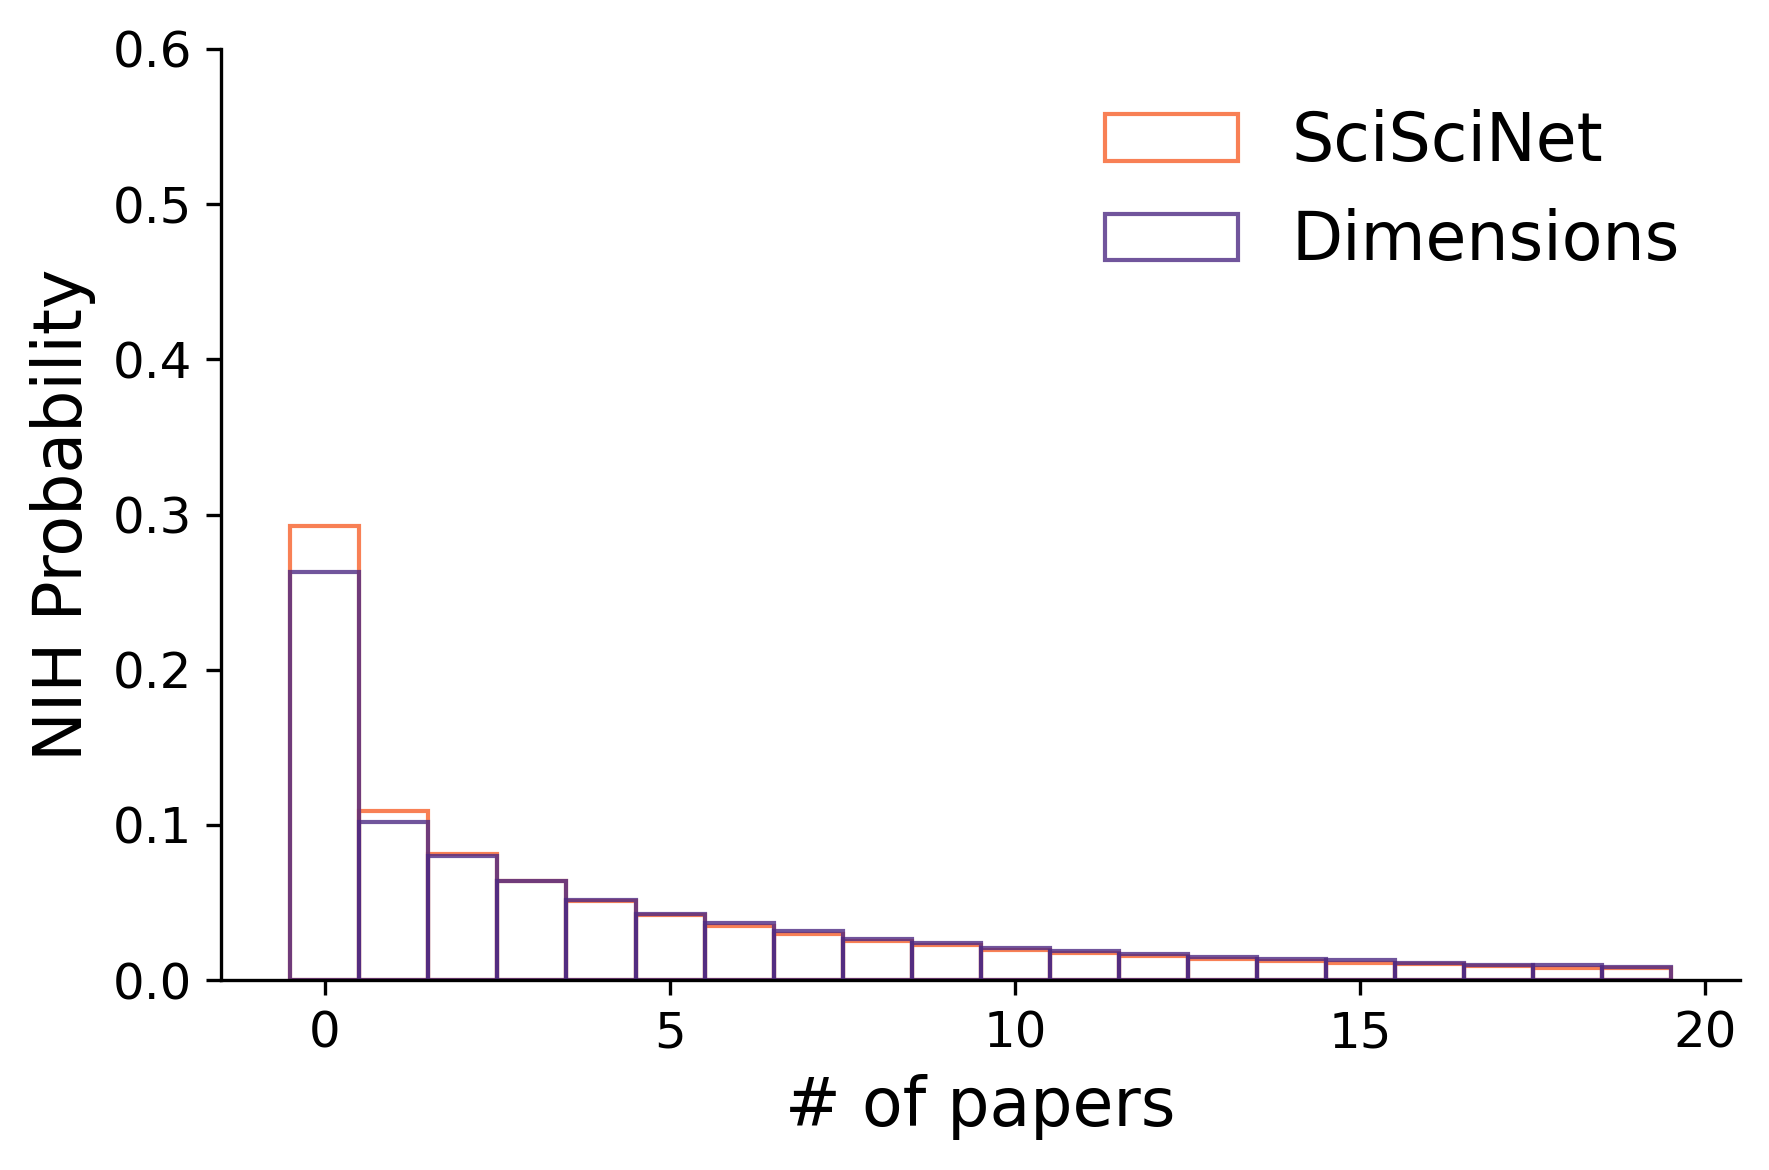

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(dpi=300)

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.bar(df_G_total_NIH_sci3.head(20).SciNet_paper_count,
        df_G_total_NIH_sci3.head(20).pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciSciNet',alpha=0.8, 
         fill= False
        )
plt.bar(df_G_total_NIH_dim3.head(20).paper_count,
        df_G_total_NIH_dim3.head(20).pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=16)
plt.ylabel('NIH Probability',size=16)
# plt.xticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
plt.ylim(0,0.6)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=16,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()

In [120]:
# f.savefig('./Figures/6_SciSciNet_Dim_NIH_ReNew2000-2020_Re.pdf', bbox_inches="tight", format="pdf")

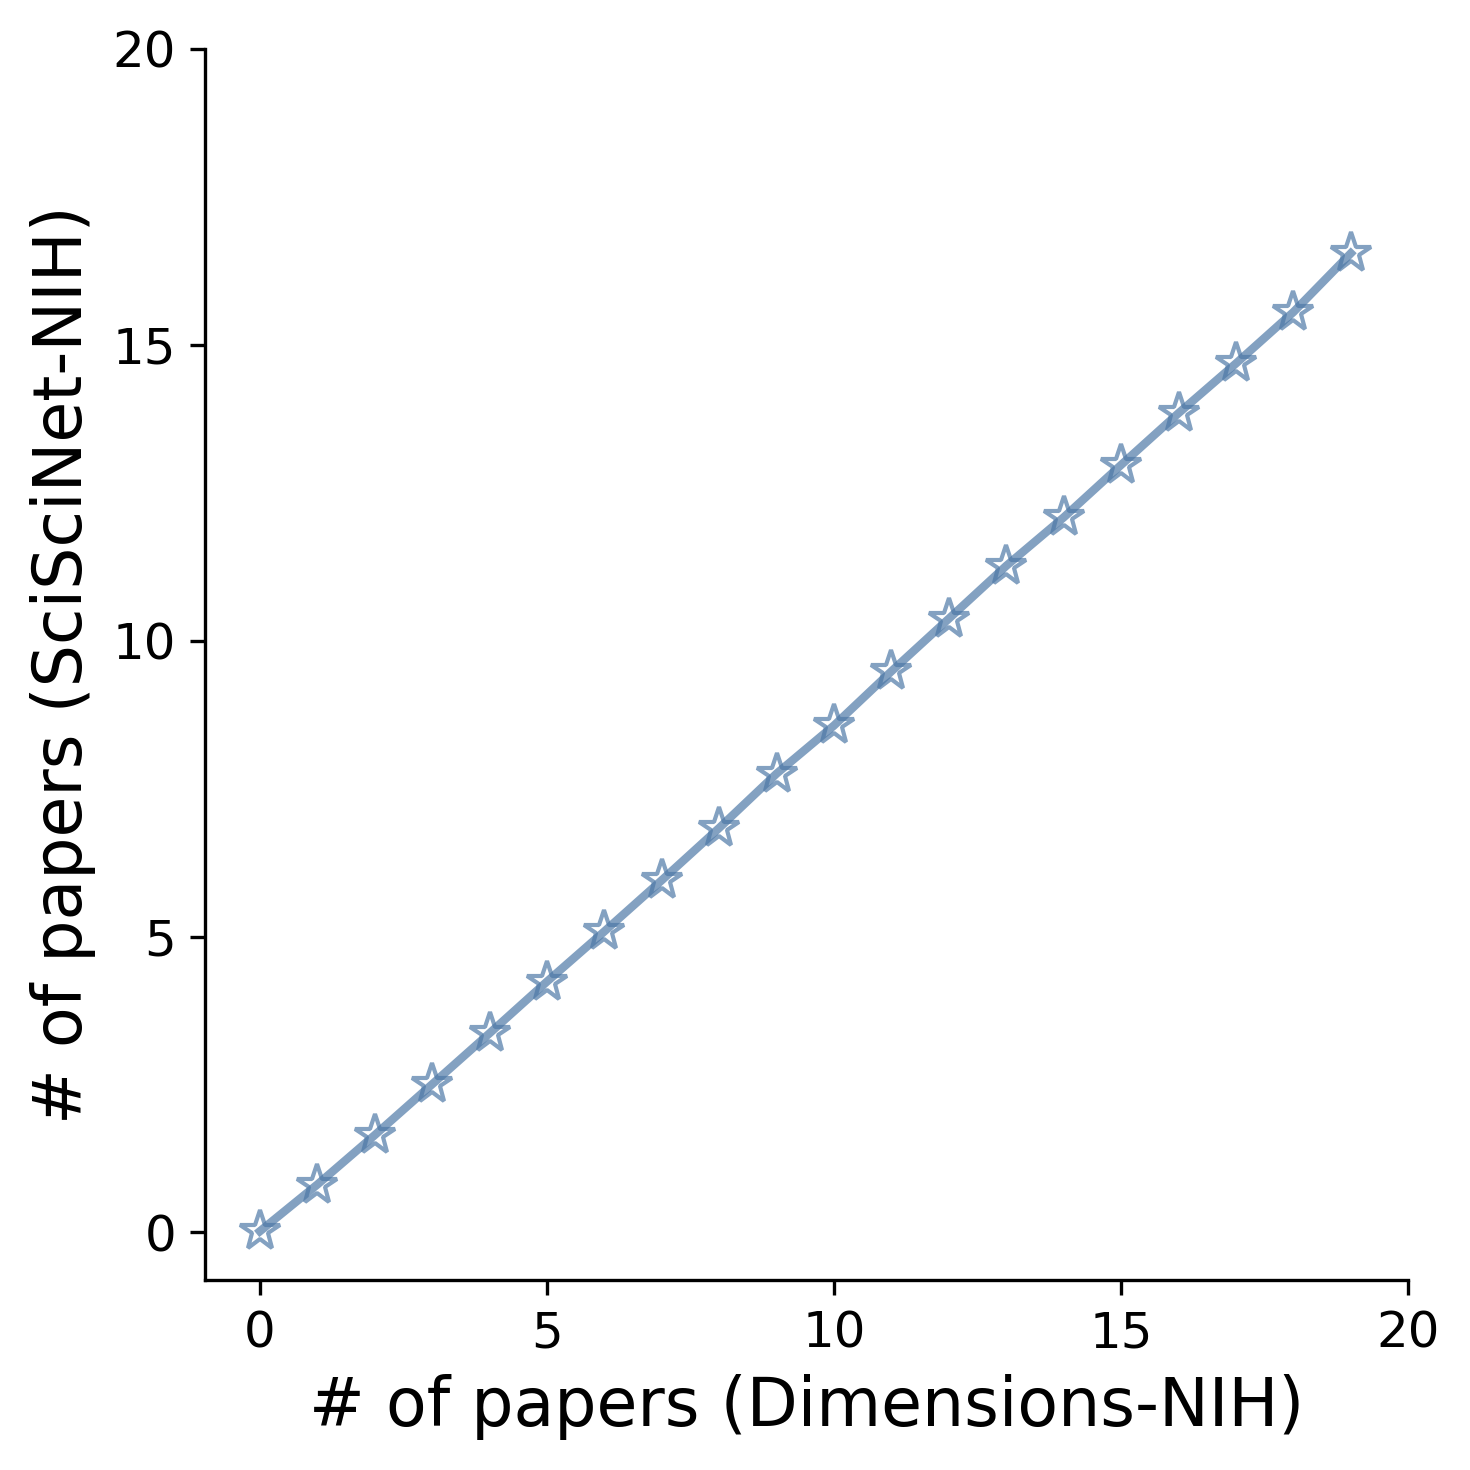

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5,5),dpi=300)

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.plot(df_G_total_NIH_Sel_Fuzzy_Further.head(20).paper_count,
        df_G_total_NIH_Sel_Fuzzy_Further.head(20).SciNet_paper_count, marker='*',
         ms=10, markeredgewidth=1, lw=2, markerfacecolor='none',alpha=0.7
        )
plt.xlabel('# of papers (Dimensions-NIH)',size=16)
plt.ylabel('# of papers (SciSciNet-NIH)',size=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
ax.set_xticks([0,5,10,15,20])
ax.set_yticks([0,5,10,15,20])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
# plt.ylim(0,20)
plt.tight_layout()

In [134]:
# f.savefig('./Figures/6_SciSciNet_Dim_NIH_ReNew_Map2000-2020_Re.pdf', bbox_inches="tight", format="pdf")

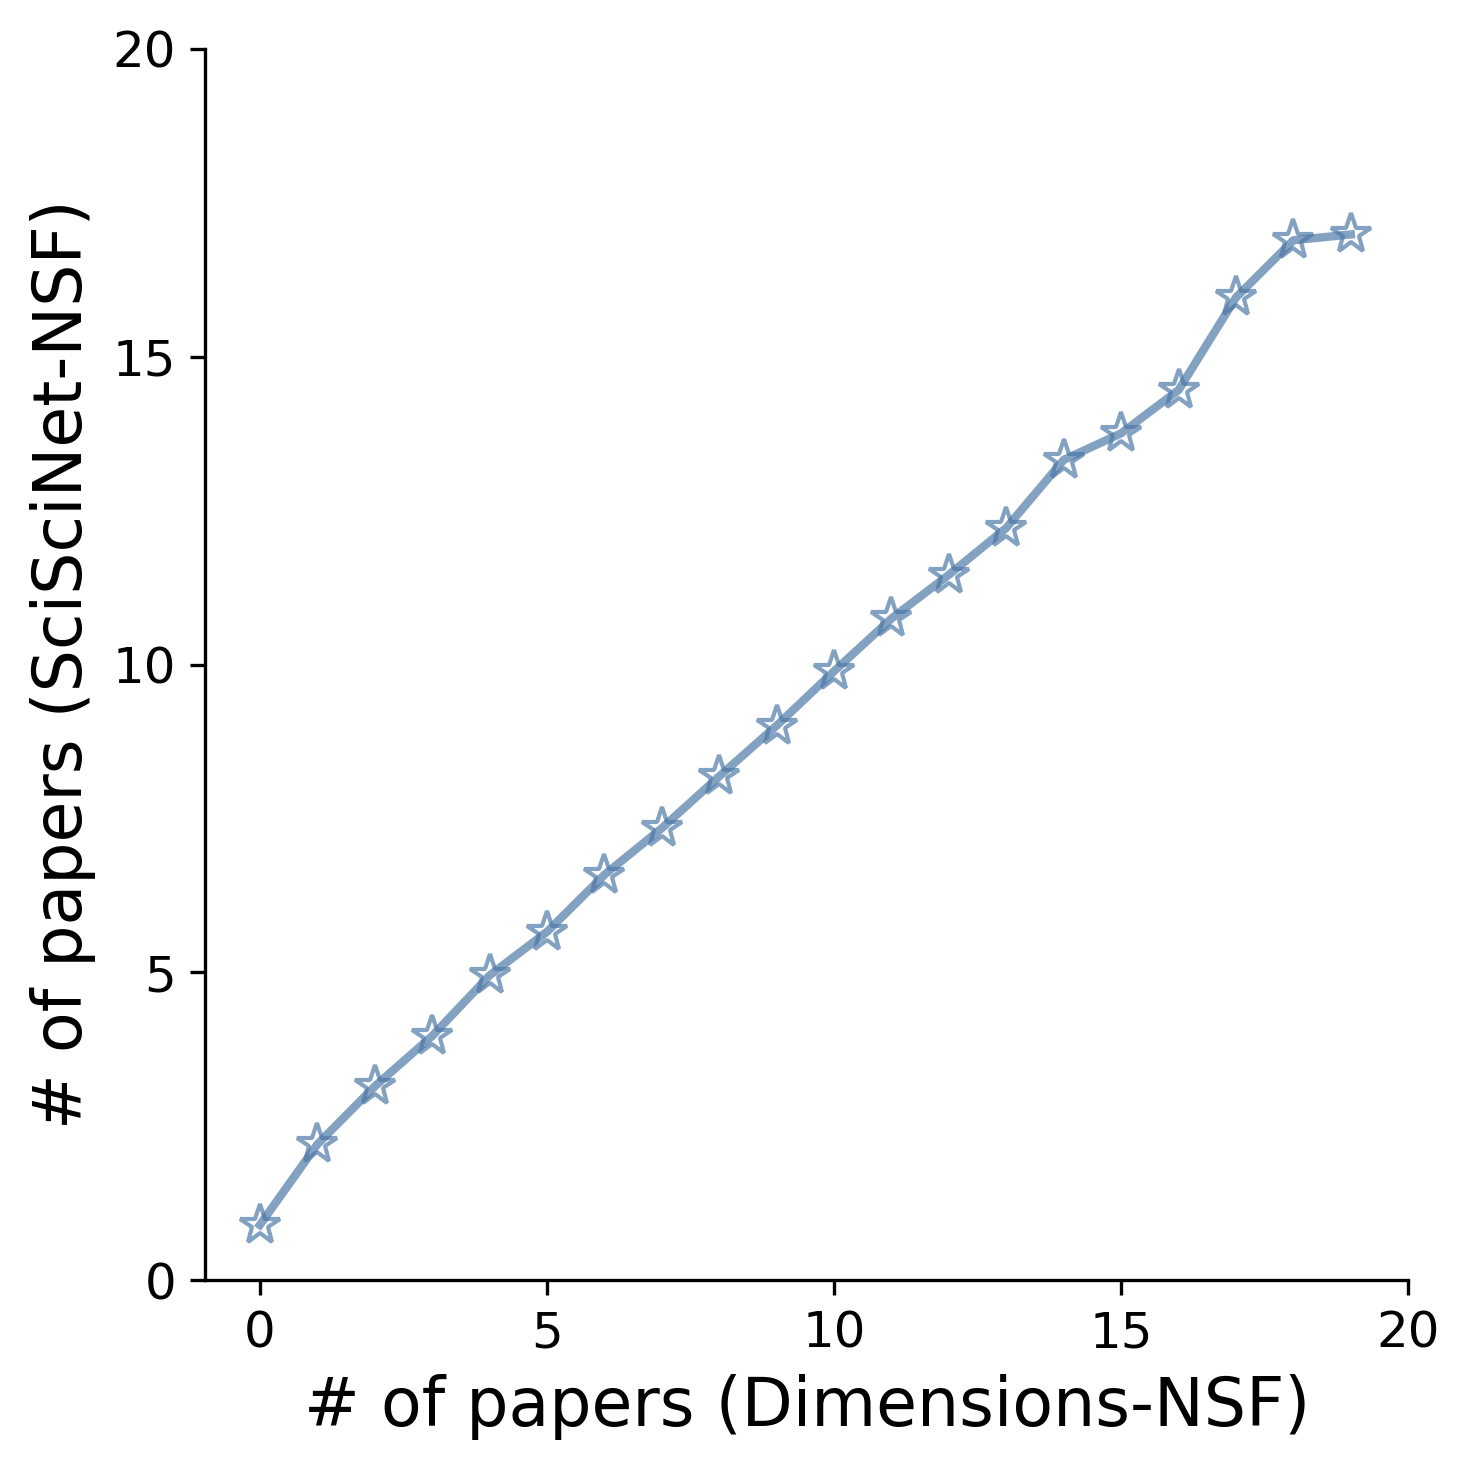

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5,5),dpi=300)

col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])
ax = f.add_subplot()
plt.plot(df_G_total_NSF_Sel_Fuzzy_Comp_Further.head(20).paper_count,
        df_G_total_NSF_Sel_Fuzzy_Comp_Further.head(20).SciNet_paper_count, marker='*',
         ms=10, markeredgewidth=1, lw=2, markerfacecolor='none',alpha=0.7
        )
plt.xlabel('# of papers (Dimensions-NSF)',size=16)
plt.ylabel('# of papers (SciSciNet-NSF)',size=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
ax.set_yticks([0,5,10,15,20])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
# plt.ylim(0,20)
plt.tight_layout()

In [137]:
# f.savefig('./Figures/6_SciSciNet_Dim_NSF_ReNew_Map2000-2020_Re.pdf', bbox_inches="tight", format="pdf")

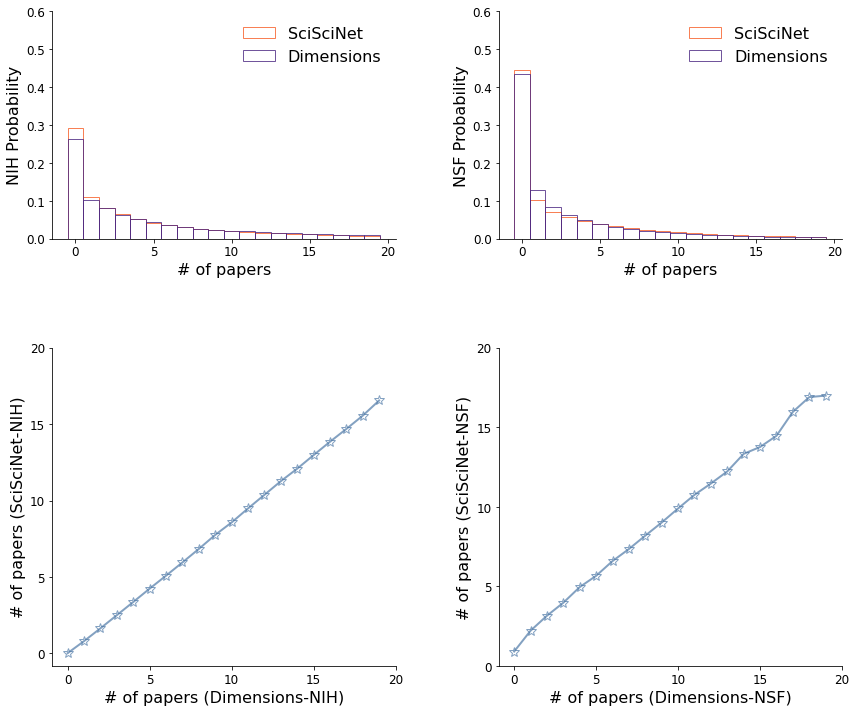

In [139]:
# fig,ax0 = plt.subplots(2,2,figsize=(12,8))
fig = plt.figure(figsize=(12,10))
widths = [6, 6]
heights = [5, 7]
gs = fig.add_gridspec(2, 2, width_ratios=widths, height_ratios=heights)


col1 = '#4E2A84'
col2 = '#F7602A'
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])


ax = fig.add_subplot(gs[0,0])
# ax = plt.subplot(2,2,1)
plt.bar(df_G_total_NIH_sci3.head(20).SciNet_paper_count,
        df_G_total_NIH_sci3.head(20).pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciSciNet',alpha=0.8, 
         fill= False
        )
plt.bar(df_G_total_NIH_dim3.head(20).paper_count,
        df_G_total_NIH_dim3.head(20).pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=16)
plt.ylabel('NIH Probability',size=16)
# plt.xticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
plt.ylim(0,0.6)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=16,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()


ax = fig.add_subplot(gs[0,1])
# ax = plt.subplot(2,2,2)
plt.bar(df_G_total_NSF_sci3.head(20).SciNet_paper_count,
        df_G_total_NSF_sci3.head(20).pct,
        width=1,
        edgecolor= col2,
#          color='#4e79a7',
         label = 'SciSciNet',alpha=0.8, 
         fill= False
        )
plt.bar(df_G_total_NSF_dim3.head(20).paper_count,
        df_G_total_NSF_dim3.head(20).pct,
        width=1,
         edgecolor= col1,
#         color='#e15759',
         label = 'Dimensions',alpha=0.8, 
         fill= False
        )
plt.xlabel('# of papers',size=16)
plt.ylabel('NSF Probability',size=16)
# plt.xticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
plt.ylim(0,0.6)
# plt.xlim(-0.5,20.5)
# leg = ax.legend(fontsize=15,frameon=False, loc=1)
plt.legend(fontsize=16,frameon=False, loc=1)
# for color,text in zip(color,leg.get_texts()):
#     text.set_color(color)
# ax.legend(fontsize=15,frameon=False)
plt.tight_layout()


# ax = plt.subplot(2,2,3)
ax = fig.add_subplot(gs[1,0])
col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])

plt.plot(df_G_total_NIH_Sel_Fuzzy_Further.head(20).paper_count,
        df_G_total_NIH_Sel_Fuzzy_Further.head(20).SciNet_paper_count, marker='*',
         ms=10, markeredgewidth=1, lw=2, markerfacecolor='none',alpha=0.7
        )
plt.xlabel('# of papers (Dimensions-NIH)',size=16)
plt.ylabel('# of papers (SciSciNet-NIH)',size=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
ax.set_xticks([0,5,10,15,20])
ax.set_yticks([0,5,10,15,20])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
# plt.ylim(0,20)
plt.tight_layout()


# ax = plt.subplot(2,2,4)
ax = fig.add_subplot(gs[1,1])
col1 = '#4E2A84'
col2 = '#F7602A'

import matplotlib as mpl
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#4e79a7','#e15759'])

plt.plot(df_G_total_NSF_Sel_Fuzzy_Comp_Further.head(20).paper_count,
        df_G_total_NSF_Sel_Fuzzy_Comp_Further.head(20).SciNet_paper_count, marker='*',
         ms=10, markeredgewidth=1, lw=2, markerfacecolor='none',alpha=0.7
        )
plt.xlabel('# of papers (Dimensions-NSF)',size=16)
plt.ylabel('# of papers (SciSciNet-NSF)',size=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
ax.set_xticks([0,5,10,15,20])
ax.set_yticks([0,5,10,15,20])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.yticks(,fontsize=15)
# plt.ylim(0,20)
plt.tight_layout()

plt.subplots_adjust(wspace=0.3, hspace=0.4)
fig.savefig('./Figures/6_SciSciNet_Dim_NSF_ReNew_Map2000-2020_Big_Huge1.pdf', bbox_inches="tight", format="pdf")